 ## Project Scratch Work

 #### Working rk4

Step Size: 0.0005000500050005


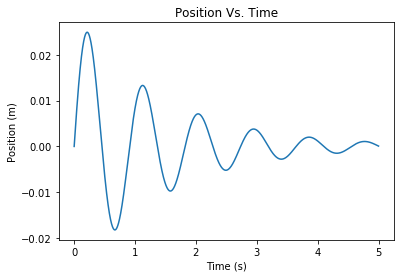

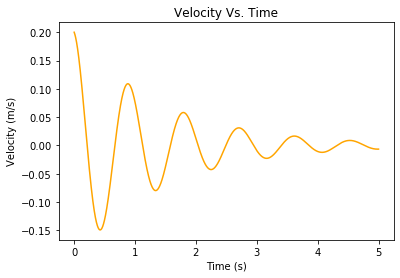

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt


fx = lambda t,x,v: v    #fx/dt which amounts to velocity
fv = lambda t,x,v: -1.4*v - 48*x#fv/dt which amounts to acceleration 

def rk4_x (ti, xi, vi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*h,xi+b21*K1*h,vi)
    K3 = fx(ti+a3*h,xi+b31*K1*h+b32*K2*h,vi)
    K4 = fx(ti+a4*h,xi+b41*K1*h+b42*K2*h+b43*K3*h,vi)   
    yip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

def rk4_v (ti, xi, vi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*h,xi,vi+b21*K1*h)
    K3 = fv(ti+a3*h,xi,vi+b31*K1*h+b32*K2*h)
    K4 = fv(ti+a4*h,xi,vi+b41*K1*h+b42*K2*h+b43*K3*h)     
    yip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1


c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for x
b = 5    #final value for x

n = 10000     #number of x values
h = (b-a)/(n-1)   #step size
iv = 0
x_rk4 = np.zeros(n)
t_rk4 = np.zeros(n)
v_rk4 = np.zeros(n)

x_rk4[0] = iv      # Initial X Position
t_rk4[0] = a       # Initial Time
v_rk4[0] = 0.2     # Initial Velocity m/s

for i in range(1,n):
    
    t_rk4[i] = a + i*h    #The next time we observing
    
    v_rk4[i] = rk4_v(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h) #I need a Velocity to use to find the position at the next time
    
    x_rk4[i] = rk4_x(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)    #The position at the selected time
    


print(f"Step Size: {h}")
plot1=plt.figure(1)
plt.plot(t_rk4,x_rk4)
plt.title("Position Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plot2=plt.figure(2)
plt.plot(t_rk4,v_rk4, color="orange")

plt.title("Velocity Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

# rk4 Overdamped

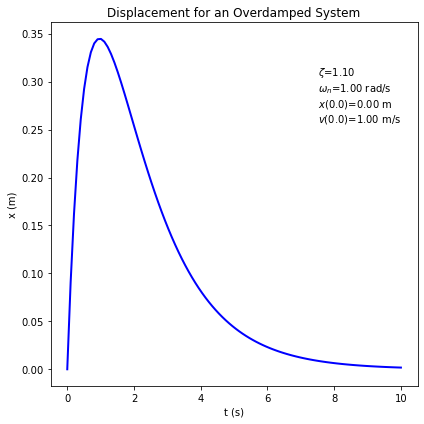

In [2]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

# rk4 Critically Damped

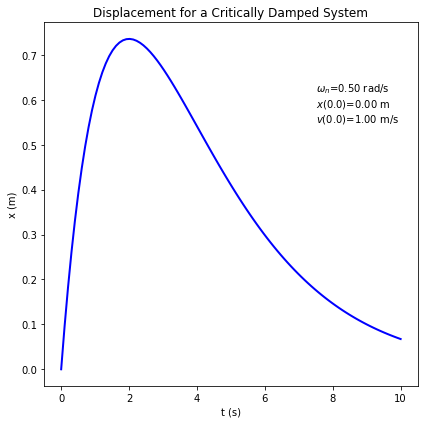

In [3]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(omega_n, t):
    return t*exp(-omega_n*t)
def v_of_t(omega_n, t):
    return exp(-omega_n*t)*(1-omega_n*t)

omega_n = 0.5

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(omega_n,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for a Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(omega_n,t[0])
v0 = v_of_t(omega_n,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

# rk4 Underdamped

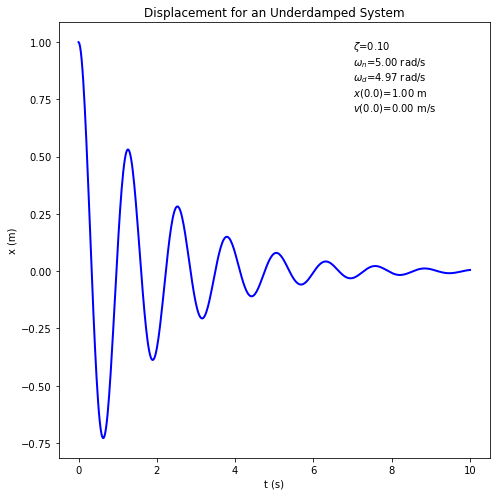

In [4]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(cos(omega_d*t)+zeta*omega_n/omega_d*sin(omega_d*t))
def v_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-omega_d*sin(omega_d*t)-zeta*omega_n*cos(omega_d*t)+zeta*omega_n/omega_d*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))       

zeta = 0.1
omega_n = 5
omega_d = omega_n*sqrt(1-zeta**2)

ti = 0.
tf = 10.
t = np.linspace(ti,tf,500)
x = [x_of_t(zeta,omega_n,omega_d,tval) for tval in t]

fig = plt.figure(figsize=(7,7))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
omega_d_str = "\omega_d"
x0 = x_of_t(zeta,omega_n,omega_d,t[0])
v0 = v_of_t(zeta,omega_n,omega_d,t[0])
txt_loc_x = 0.70*tf
txt_loc_y = 0.70*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

# Rk4 with force 

### Tested With Symbolab

Step Size: 0.0005000500050005


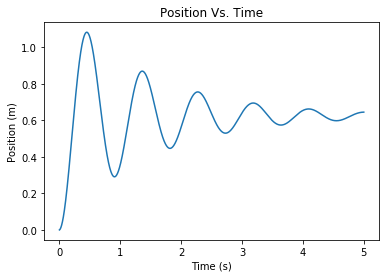

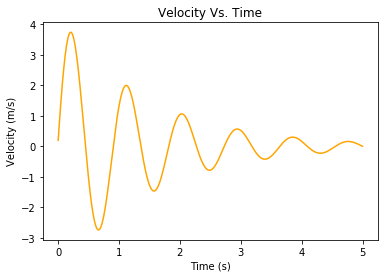

In [5]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt


fx = lambda t,x,v: v    #fx/dt which amounts to velocity
fv = lambda t,x,v,force: -1.4*v - 48*x + force#fv/dt which amounts to acceleration 

def rk4_x (ti, xi, vi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*h,xi+b21*K1*h,vi)
    K3 = fx(ti+a3*h,xi+b31*K1*h+b32*K2*h,vi)
    K4 = fx(ti+a4*h,xi+b41*K1*h+b42*K2*h+b43*K3*h,vi)   
    yip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

def rk4_v (ti, xi, vi, force, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fv(ti,xi,vi,force)
    K2 = fv(ti+a2*h,xi,vi+b21*K1*h,force)
    K3 = fv(ti+a3*h,xi,vi+b31*K1*h+b32*K2*h,force)
    K4 = fv(ti+a4*h,xi,vi+b41*K1*h+b42*K2*h+b43*K3*h,force)     
    yip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1


c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for x
b = 5    #final value for x

n = 10000     #number of x values
h = (b-a)/(n-1)   #step size
iv = 0
x_rk4 = np.zeros(n)
t_rk4 = np.zeros(n)
v_rk4 = np.zeros(n)
force = 30  #force on mass 

x_rk4[0] = iv      # Initial X Position
t_rk4[0] = a       # Initial Time
v_rk4[0] = 0.2     # Initial Velocity m/s

for i in range(1,n):
    
    t_rk4[i] = a + i*h    #The next time we observing
    
    v_rk4[i] = rk4_v(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],force,c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h) #I need a Velocity to use to find the position at the next time
    
    x_rk4[i] = rk4_x(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)    #The position at the selected time
    


print(f"Step Size: {h}")
plot1=plt.figure(1)
plt.plot(t_rk4,x_rk4)
plt.title("Position Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plot2=plt.figure(2)
plt.plot(t_rk4,v_rk4, color="orange")

plt.title("Velocity Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

# Rk4 with force with time



Step Size: 0.005000500050005001


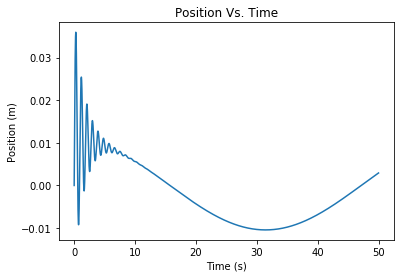

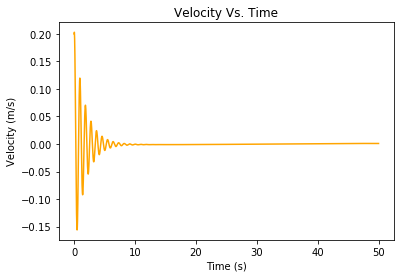

In [6]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt


fx = lambda t,x,v: v    #fx/dt which amounts to velocity
fv = lambda t,x,v,force: -1.4*v - 48*x + force  #fv/dt which amounts to acceleration 

def rk4_x (ti, xi, vi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*h,xi+b21*K1*h,vi)
    K3 = fx(ti+a3*h,xi+b31*K1*h+b32*K2*h,vi)
    K4 = fx(ti+a4*h,xi+b41*K1*h+b42*K2*h+b43*K3*h,vi)   
    yip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

def rk4_v (ti, xi, vi, force, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fv(ti,xi,vi,force)
    K2 = fv(ti+a2*h,xi,vi+b21*K1*h,force)
    K3 = fv(ti+a3*h,xi,vi+b31*K1*h+b32*K2*h,force)
    K4 = fv(ti+a4*h,xi,vi+b41*K1*h+b42*K2*h+b43*K3*h,force)     
    yip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1


c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for t
b = 50    #final value for t

n = 10000     #number of t values
h = (b-a)/(n-1)   #step size
iv = 0
x_rk4 = np.zeros(n)
t_rk4 = np.zeros(n)
v_rk4 = np.zeros(n)
 

x_rk4[0] = iv      # Initial X Position
t_rk4[0] = a       # Initial Time
v_rk4[0] = 0.2     # Initial Velocity m/s

for i in range(1,n):
    
   
    
    t_rk4[i] = a + i*h    #The next time we observing
    
    force = 0.5*cos(0.1*t_rk4[i]) #The force acting on the mass with respect with time
    
    v_rk4[i] = rk4_v(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],force,c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h) #I need a Velocity to use to find the position at the next time
    
    x_rk4[i] = rk4_x(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)    #The position at the selected time
    


print(f"Step Size: {h}")
plot1=plt.figure(1)
plt.plot(t_rk4,x_rk4)
plt.title("Position Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plot2=plt.figure(2)
plt.plot(t_rk4,v_rk4, color="orange")

plt.title("Velocity Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

# Rk4 with force in project format


### With Force Matches with Lemley Code has zeta, omega, force


Step Size: 0.7142857142857143


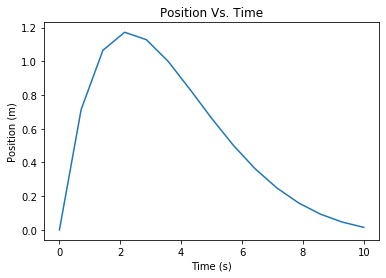

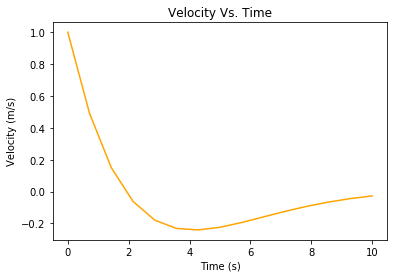

In [7]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt


fx = lambda t,x,v: v    #fx/dt which amounts to velocity
fv = lambda t,x,v,force,zeta,omega: -2*zeta*omega*v - pow(omega,2)*x + force  #fv/dt which amounts to acceleration 

zeta=1 #Constant for to Identify Dampening Type
omega= 0.5 # natural frequency in rad/s
force= 0  # force acting on the mass in Newtons

def rk4_x (ti, xi, vi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*h,xi+b21*K1*h,vi)
    K3 = fx(ti+a3*h,xi+b31*K1*h+b32*K2*h,vi)
    K4 = fx(ti+a4*h,xi+b41*K1*h+b42*K2*h+b43*K3*h,vi)   
    yip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

def rk4_v (ti, xi, vi, force, zeta, omega, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fv(ti,xi,vi,force,zeta,omega)
    K2 = fv(ti+a2*h,xi,vi+b21*K1*h,force,zeta,omega)
    K3 = fv(ti+a3*h,xi,vi+b31*K1*h+b32*K2*h,force,zeta,omega)
    K4 = fv(ti+a4*h,xi,vi+b41*K1*h+b42*K2*h+b43*K3*h,force,zeta,omega)     
    yip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1


c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for t
b = 10    #final value for t

n = 15    #number of t values
h = (b-a)/(n-1)   #step size
x_rk4 = np.zeros(n)
t_rk4 = np.zeros(n)
v_rk4 = np.zeros(n)
 

x_rk4[0] = 0     # Initial X Position in meters
t_rk4[0] = a       # Initial Time in seconds 
v_rk4[0] = 1   # Initial Velocity m/s

for i in range(1,n):
    
   
    
    t_rk4[i] = a + i*h    #The next time we observing
    
    #force = 1*cos(0.1*t_rk4[i]) #The force acting on the mass with respect with time
    
    v_rk4[i] = rk4_v(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],force,zeta,omega,c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h) #I need a Velocity to use to find the position at the next time
    
    x_rk4[i] = rk4_x(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)    #The position at the selected time
    


print(f"Step Size: {h}")
plot1=plt.figure(1)
plt.plot(t_rk4,x_rk4)
plt.title("Position Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plot2=plt.figure(2)
plt.plot(t_rk4,v_rk4, color="orange")
plt.title("Velocity Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

# RK4 Wih Resonance

Step Size: 0.010001000100010001


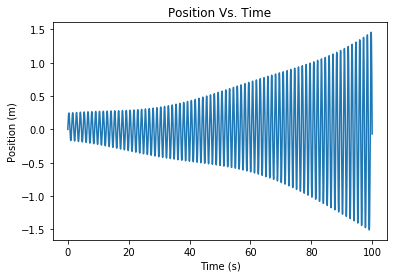

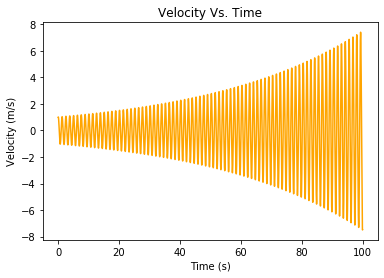

In [8]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt


fx = lambda t,x,v: v    #fx/dt which amounts to velocity
fv = lambda t,x,v,force,zeta,omega: -2*zeta*omega*v - pow(omega,2)*x + force  #fv/dt which amounts to acceleration 

zeta=.021 #Constant for to Identify Dampening Type
omega=5  # natural frequency in rad/s
#force= 0  # force acting on the mass in Newtons

def rk4_x (ti, xi, vi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*h,xi+b21*K1*h,vi)
    K3 = fx(ti+a3*h,xi+b31*K1*h+b32*K2*h,vi)
    K4 = fx(ti+a4*h,xi+b41*K1*h+b42*K2*h+b43*K3*h,vi)   
    yip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

def rk4_v (ti, xi, vi, force, zeta, omega, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fv(ti,xi,vi,force,zeta,omega)
    K2 = fv(ti+a2*h,xi,vi+b21*K1*h,force,zeta,omega)
    K3 = fv(ti+a3*h,xi,vi+b31*K1*h+b32*K2*h,force,zeta,omega)
    K4 = fv(ti+a4*h,xi,vi+b41*K1*h+b42*K2*h+b43*K3*h,force,zeta,omega)     
    yip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1


c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for t
b = 100    #final value for t

n = 10000    #number of t values
h = (b-a)/(n-1)   #step size
x_rk4 = np.zeros(n)
t_rk4 = np.zeros(n)
v_rk4 = np.zeros(n)
 

x_rk4[0] = 0     # Initial X Position in meters
t_rk4[0] = a       # Initial Time in seconds 
v_rk4[0] = 1   # Initial Velocity m/s

for i in range(1,n):
    
   
    
    t_rk4[i] = a + i*h    #The next time we observing
    
    force = 1*cos(0.1*t_rk4[i]) #The force acting on the mass with respect with time
    
    v_rk4[i] = rk4_v(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],force,zeta,omega,c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h) #I need a Velocity to use to find the position at the next time
    
    x_rk4[i] = rk4_x(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)    #The position at the selected time
    


print(f"Step Size: {h}")
plot1=plt.figure(1)
plt.plot(t_rk4,x_rk4)
plt.title("Position Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plot2=plt.figure(2)
plt.plot(t_rk4,v_rk4, color="orange")

plt.title("Velocity Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

### RK4 with callable function file 

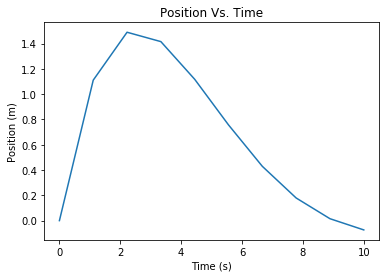

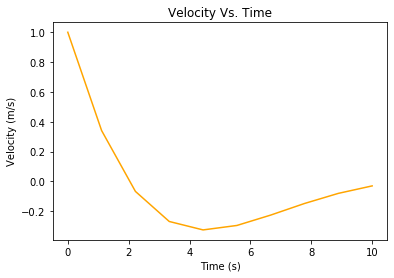

In [14]:
%run prk4.ipynb

zeta=1 #Constant for to Identify Dampening Type
omega= 0.5 # natural frequency in rad/s
force= 0  # force acting on the mass if constant in Newtons
t1 = 0.0    #initial value for t in seconds
t2 = 10    #final value for t in seconds 
dt = 10 #How many iterations to break delta time into 
h = (t2-t1)/(dt-1)   #step size

x_rk4 = np.zeros(dt)
t_rk4 = np.zeros(dt)
v_rk4 = np.zeros(dt)

x_rk4[0] = 0     # Initial X Position in meters
t_rk4[0] = ti       # Initial Time in seconds 
v_rk4[0] = 1   # Initial Velocity m/s

for i in range(1,dt):
    
   
    
    t_rk4[i] = t1 + i*h    #The next time we observing
    
    #force = 1*cos(0.1*t_rk4[i]) #The force acting on the mass with respect with time
    
    v_rk4[i] = rk4_v(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],force,zeta,omega,c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h) #I need a Velocity to use to find the position at the next time
    
    x_rk4[i] = rk4_x(t_rk4[i-1],x_rk4[i-1],v_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)    #The position at the selected time
    


myplot_position(t_rk4,x_rk4)
myplot_velocity(t_rk4,v_rk4)

## Getting Calculated Values for All damp cases 

#### For All Cases 

As you can see the Overdamped Calculated, Critically Damped, and Underdamped Data is the Same as the RK4 Data Above 



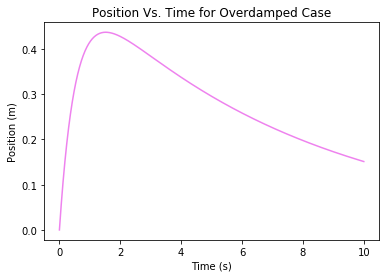

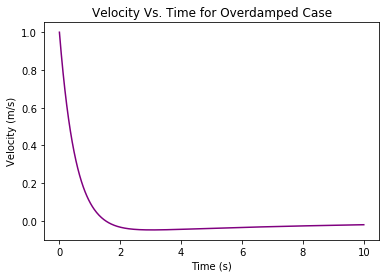

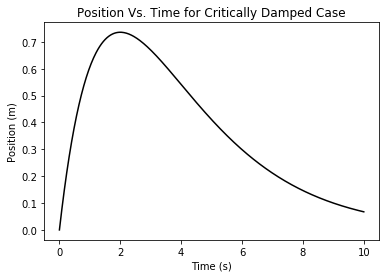

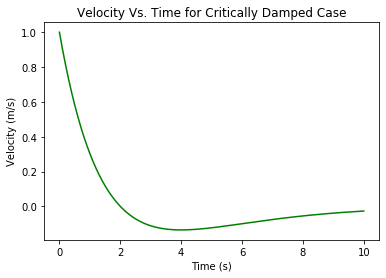

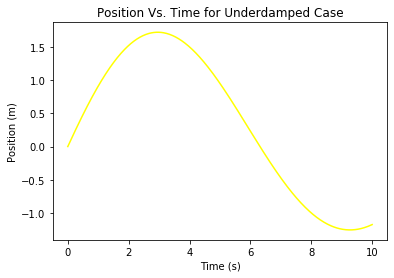

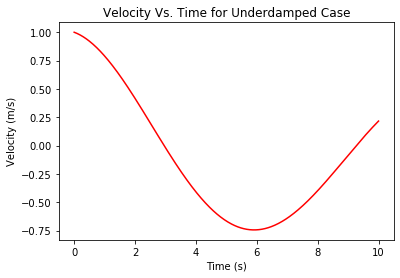

In [16]:
%matplotlib inline
%run prk4.ipynb

from math import *
import numpy as np
import matplotlib.pyplot as plt

def xod_of_t(CI,CII,lI,lII,t):
    return CI*exp(lI*t)+CII*exp(lII*t)
def vod_of_t(CI,CII,lI,lII,t):
    return CI*lI*exp(lI*t)+CII*lII*exp(lII*t)

def xcd_of_t(CI,CII,omega_n,t):
    return CI*exp(-omega_n*t)+CII*t*exp(-omega_n*t)
def vcd_of_t(CI,CII,omega_n,t):
    return exp(-omega_n*t)*(-omega_n*CI+CII*(1-omega_n*t))

def xud_of_t(DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(DI*cos(omega_d*t) + DII*sin(omega_d*t))
def vud_of_t(DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-DI*(omega_d*sin(omega_d*t)+zeta*omega_n*cos(omega_d*t)) + DII*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))

zeta_od = 2
omega_n = 0.5
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od**2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od**2 - 1))
zeta_ud = 0.1
omega_d = omega_n*sqrt(1-zeta_ud**2)

A = 0    #x(o)
B = 1    #v(0)

CI_od = (B-A*lambda_II)/(lambda_I-lambda_II)
CII_od = (A*lambda_I-B)/(lambda_I-lambda_II)
CI_cd = A
CII_cd = B + omega_n*A
DI = A
DII = (B+A*zeta_ud*omega_n)/omega_d

ti = 0.
tf = 10.
t = np.linspace(ti,tf,500)
x_od = [xod_of_t(CI_od,CII_od,lambda_I,lambda_II,tval) for tval in t]
x_cd = [xcd_of_t(CI_cd,CII_cd,omega_n,tval) for tval in t]
x_ud = [xud_of_t(DI,DII,zeta_ud,omega_n,omega_d,tval) for tval in t]

v_od = [vod_of_t(CI_od,CII_od,lambda_I,lambda_II,tval) for tval in t]
v_cd = [vcd_of_t(CI_cd,CII_cd,omega_n,tval) for tval in t]
v_ud = [vud_of_t(DI,DII,zeta_ud,omega_n,omega_d,tval) for tval in t]


x0 = x_cd[0]
v0 = v_cd[0]



x0 = x_cd[0]
v0 = v_cd[0]

print("As you can see the Overdamped Calculated, Critically Damped, and Underdamped Data is the Same as the RK4 Data Above \n")
myplot_overdamped_position(t,x_od)
myplot_overdamped_velocity(t,v_od)

myplot_critically_damped_position(t,x_cd)
myplot_critically_damped_velocity(t,v_cd)

myplot_underdamped_position(t,x_ud)
myplot_underdamped_velocity(t,v_ud)

